In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import uniform
from time import time
from multiprocessing import Pool
import dask.array as da

# Simple 

In [2]:
def simulation(number_of_darts):
    number_of_darts_in_circle=0.0
    start_time=time()
    
    for n in range(number_of_darts):
        x, y = uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2+(y-0.5)**2)<=0.5:
            number_of_darts_in_circle += 1 
        
    pi_approx= 4*number_of_darts_in_circle/float(number_of_darts)
    end_time=time()
    execution_time=end_time-start_time
       
    print("Method 1: Calculation without Parallelism")
    print('Pi Approximation: ', pi_approx)
    print('Number of Darts: ', number_of_darts)
    print('Execution Time: ', execution_time)
    print('Darts Thrown per Second: ', number_of_darts/execution_time)
    
    return(execution_time, number_of_darts/execution_time)

In [3]:
simulation(100000)

Method 1: Calculation without Parallelism
Pi Approximation:  3.14228
Number of Darts:  100000
Execution Time:  0.18668603897094727
Darts Thrown per Second:  535658.6949469872


(0.18668603897094727, 535658.6949469872)

# Multiprocessing

In [4]:
def one_run(in_circle=0):
    x, y = uniform(0,1), uniform(0,1)
    if sqrt((x-0.5)**2+(y-0.5)**2)<=0.5:
        in_circle=1
    return(in_circle)

In [5]:
one_run()

0

In [6]:
def mp_simulation(number_of_darts):
    pool = Pool(processes=4)
    start_time=time()
    g=pool.map(one_run, range(number_of_darts))
    pi_approx= 4*sum(g)/float(number_of_darts)
    end_time=time()
    execution_time=end_time-start_time
    del pool
    
    print("Method 2: Calculation Using Multiprocessing")
    print('Pi Approximation: ', pi_approx)
    print('Number of Darts: ', number_of_darts)
    print('Execution Time: ', execution_time)
    print('Darts Thrown per Second: ', number_of_darts/execution_time)
    
    return(execution_time, number_of_darts/execution_time)

In [7]:
mp_simulation(100000)

Method 2: Calculation Using Multiprocessing
Pi Approximation:  42616.33084
Number of Darts:  100000
Execution Time:  0.11759805679321289
Darts Thrown per Second:  850354.1871941157


(0.11759805679321289, 850354.1871941157)

# DASK

In [8]:
def dask_simulation(number_of_darts):
    start_time=time()
    x = da.random.uniform(0,1,size=number_of_darts, chunks=1000) 
    y = da.random.uniform(0,1,size=number_of_darts, chunks=1000)
    dart_in_circle=(x-0.5)**2 + (y-0.5)**2 < 0.5**2
    pi_approx= 4*sum(dart_in_circle.compute())/float(number_of_darts)
    end_time=time()
    execution_time=end_time-start_time
    
    print("Method 3: Calculation Using DASK")
    print('Pi Approximation: ', pi_approx)
    print('Number of Darts: ', number_of_darts)
    print('Execution Time: ', execution_time)
    print('Darts Thrown per Second: ', number_of_darts/execution_time)
    
    return(execution_time, number_of_darts/execution_time)

In [9]:
dask_simulation(100000)

Method 3: Calculation Using DASK
Pi Approximation:  3.14952
Number of Darts:  100000
Execution Time:  0.4294250011444092
Darts Thrown per Second:  232869.53422251143


(0.4294250011444092, 232869.53422251143)

In [10]:
no_dart = np.logspace(1,7,9)
no_dart = no_dart.astype(int)
sim_time=np.ones(no_dart.size)
sim_rate=np.ones(no_dart.size)
mp_time=np.ones(no_dart.size)
mp_rate=np.ones(no_dart.size)
dask_time=np.ones(no_dart.size)
dask_rate=np.ones(no_dart.size)

In [11]:
for i in range(no_dart.size):
    sim_time[i],sim_rate[i]=simulation(no_dart[i])
    mp_time[i],mp_rate[i]=mp_simulation(no_dart[i])
    dask_time[i],dask_rate[i]=dask_simulation(no_dart[i])

Method 1: Calculation without Parallelism
Pi Approximation:  4.0
Number of Darts:  10
Execution Time:  8.487701416015625e-05
Darts Thrown per Second:  117817.52809
Method 2: Calculation Using Multiprocessing
Pi Approximation:  9.2
Number of Darts:  10
Execution Time:  0.005920886993408203
Darts Thrown per Second:  1688.93613594
Method 3: Calculation Using DASK
Pi Approximation:  3.2
Number of Darts:  10
Execution Time:  0.023488998413085938
Darts Thrown per Second:  425.731222087
Method 1: Calculation without Parallelism
Pi Approximation:  3.0714285714285716
Number of Darts:  56
Execution Time:  0.00014519691467285156
Darts Thrown per Second:  385683.126437
Method 2: Calculation Using Multiprocessing
Pi Approximation:  21.0
Number of Darts:  56
Execution Time:  0.004478931427001953
Darts Thrown per Second:  12502.9822208
Method 3: Calculation Using DASK
Pi Approximation:  2.85714285714
Number of Darts:  56
Execution Time:  0.019743919372558594
Darts Thrown per Second:  2836.31628266
Me

In [12]:
%matplotlib inline

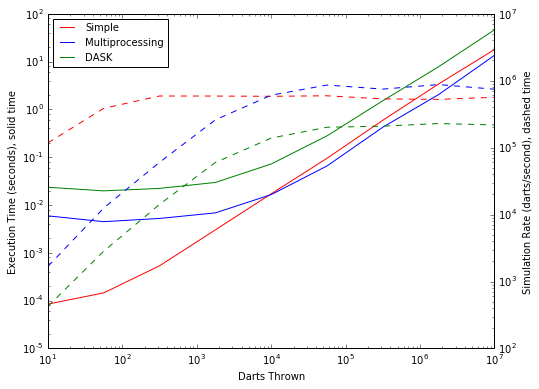

In [25]:
fig,ax1=plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
plt.yscale('log')
plt.xscale('log')
ax1.set_yscale("log")
ax2.yaxis.tick_right() 
sim1 = ax1.plot(no_dart, sim_time, color = 'red', linestyle = '-', label = "Simple")
sim2 = ax2.plot(no_dart, sim_rate, color = 'red', linestyle = '--', label = "Simple")
mp1 = ax1.plot(no_dart, mp_time, color = 'blue', linestyle = '-', label = "Multiprocessing")
mp2 = ax2.plot(no_dart, mp_rate, color = 'blue', linestyle = '--', label = "Multiprocessing")
dask1 = ax1.plot(no_dart, dask_time, color = 'green', linestyle = '-', label = "DASK")
dask2 = ax2.plot(no_dart, dask_rate, color = 'green', linestyle = '--', label = "DASK")

ax1.minorticks_on()
ax2.minorticks_on()
ax1.set_ylim(10**(-5), 10**2)
ax2.set_ylim(10**2, 10**7)
ax1.set_ylabel('Execution Time (seconds), solid time')
ax1.set_xlabel('Darts Thrown')
ax2.set_ylabel('Simulation Rate (darts/second), dashed time')
ax1.legend(prop={'size':10}, loc = 0)

I collaborated with Kevin Li and Shiman Ding.